In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as pyplot

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df

In [ ]:
df.iloc[0:10]

In [ ]:
df.iloc[
    0:10, #Rango de datos a mostrar, del 0 (primero) al 10
    [0,2,6,15]  #index permite elegir la columna a mostrar, si paso un array con las columnas solo trae aquellas seleccionadas y no todas en medio
]

In [ ]:
df.loc[0:10]

In [ ]:
df.loc[:,'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

**Cleaning**

In [ ]:
salary_year_median = df['salary_year_avg'].median()
salary_hour_median = df['salary_hour_avg'].median()

In [ ]:
df_filled = df

In [ ]:
df['salary_year_avg'] = df_filled['salary_year_avg'].fillna(salary_year_median)

In [ ]:
df['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(salary_hour_median)

In [ ]:
df_filled.loc[:10, 'salary_year_avg':'salary_hour_avg']

**Drop Duplicates**

In [ ]:
df_unique = df_filled

In [ ]:
df_unique = df_unique.drop_duplicates()

In [ ]:
print('Length of original df:    ',len(df_filled) )
print('Length of drop duplicates df:    ',len(df_unique) )
print('rows dropped:    ',len(df_filled)-len(df_unique) )

In [ ]:
df_unique = df_unique.drop_duplicates(subset=['job_title', 'company_name'])

**Data Management (Copy y Sample)**

In [ ]:
df.sample(10, random_state=42)

In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

In [ ]:
df_copy = df_original.copy()

La copia contiene los mismos datos, pero si la modificamos **el DataFrame original no sufre modificaciones**

In [ ]:
df_copy

**Pivot Tables**

In [ ]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

***Cantidad de trabajos por Tipo***

In [ ]:
df.pivot_table(index='job_title_short', aggfunc='size')

***Salario promedio por trabajo***

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

***Salario promedio por pais***

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short',aggfunc='median').fillna(0)

**Top 6 Countries + Plot(), specific jobs**

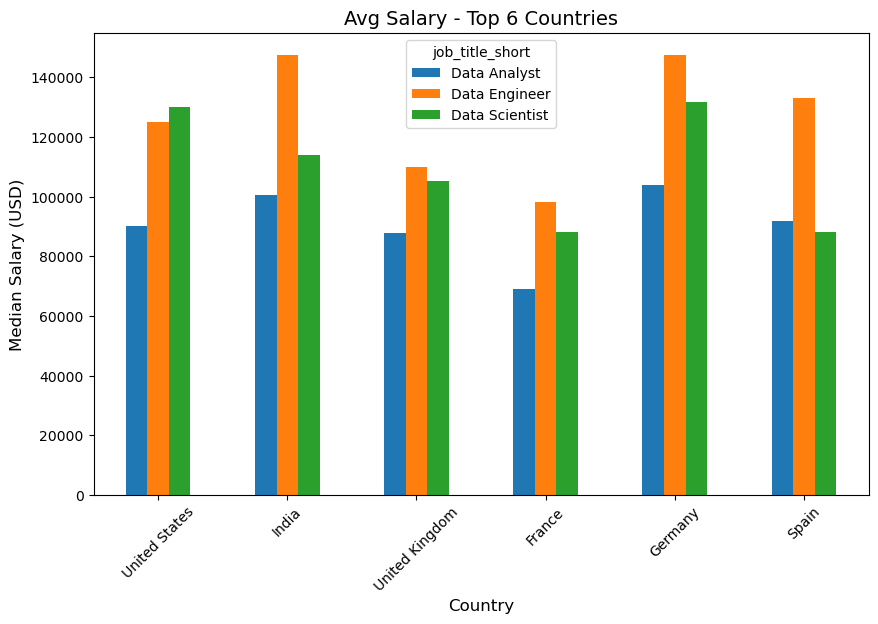

In [66]:
# Obtengo los top 6 paises
top_countries = df['job_country'].value_counts().head(6).index

# Pivot Table para agrupar los datos
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

# Pivot Table con los top 6 paises
df_job_country_salary = df_job_country_salary.loc[top_countries]

# Trabajos buscados
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

# Filtramos para obtener solo aquellos datos que esten dentro de los trabajos buscados
df_job_country_salary = df_job_country_salary[job_titles]

# Generamos el grafico
df_job_country_salary.plot(kind='bar', figsize=(10,6))

# Titulo
plt.title('Avg Salary - Top 6 Countries', fontsize=14)

# Etiquetas
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar grafico
plt.show()

